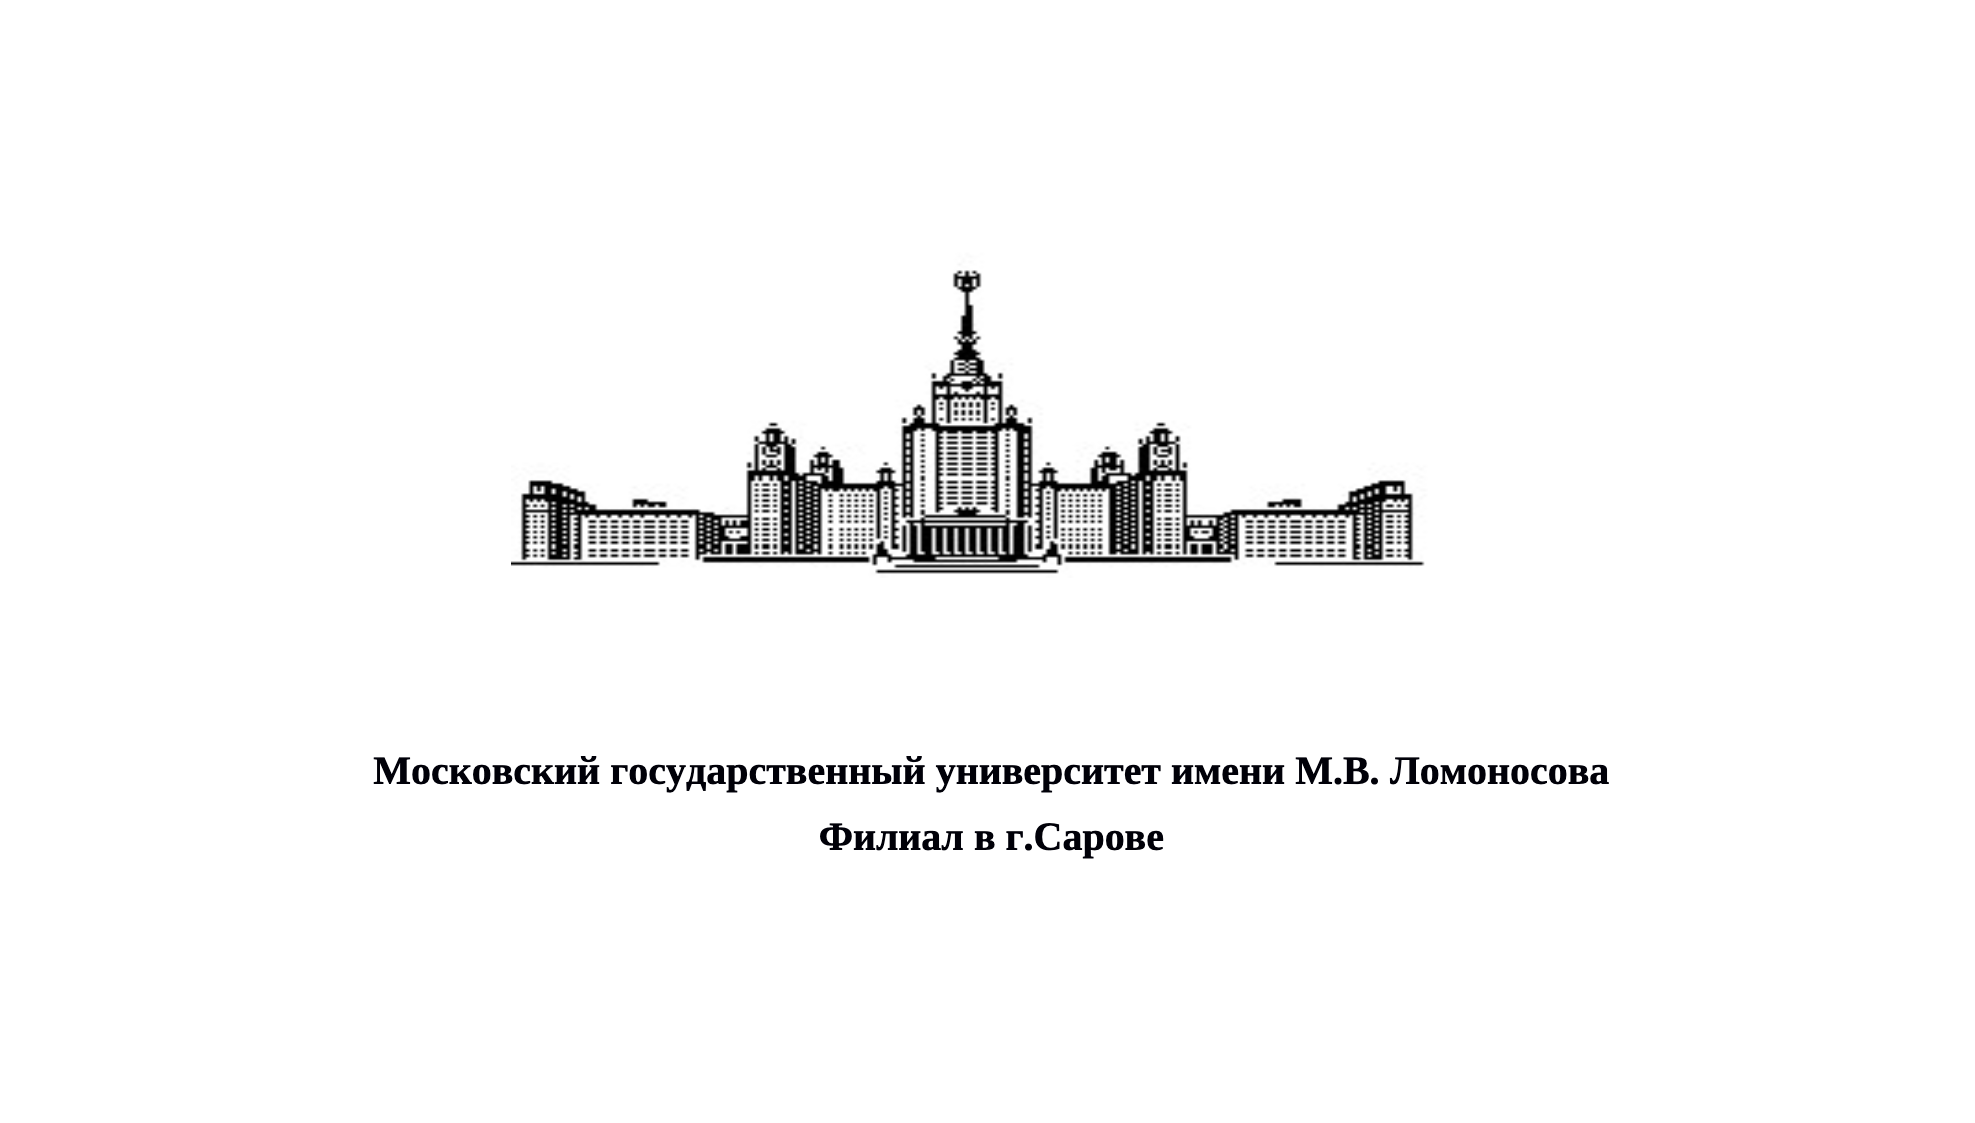

<center>Руденко А.С.</center>

<center>Практикум по теме "Квазиньютоновские методы."</center>

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import cvxpy as cvx

import matplotlib.pyplot as plt
import scipy.optimize as scopt
import seaborn as sns

from numpy.core.multiarray import result_type
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.optimize as scopt

import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque

In [ ]:

def f(x):
    x, y= x[0], x[1]
    return (x*x+y-11)**2 + (x+y*y-7)**2

def grad_f(x):
    x, y= x[0], x[1]
    return np.array([4* x * (x*x+y-11) + 2 *( x+y*y-7),  4 * y *(x+y*y-7 ) + 2*(x*x+y-11) ])

def hess_f(x):
    x, y= x[0], x[1]
    return np.array([[4*  (x*x+y-11) + 8*x*x +2, 4*x+4*y],  [4*x+4*y,4* (x+y*y-7) + 8*y*y +2 ] ])



## Как выбрать шаг $\alpha_k$?

Список подходов:


#### -  Постоянный шаг
$$
\alpha_k = \overline{\alpha}
$$


\+ легко

\- не адаптивно

#### - Априорно заданная последовательность
$$
\alpha_k = \dfrac{\overline{\alpha}}{\sqrt{k+1}}
$$


\+ легко

\+ чуть более адаптивно

\- можем скатиться в ноль


#### -  Наискорейший спуск
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

###  Требования убывания
Требование достаточного убывания, требование существенного убывания и условие кривизны: для некоторых  $\beta_{1}$ $\beta_{2}$
, таких что $0 < \beta_{1} < \beta_{2} < 1$
 найти $x_{k+1}$
 такую что
- достаточное убывание $
 f(x_{k+1}) \leq \alpha_k \beta_{1} \langle  f'(x_k), h_k\rangle +  f(x_k)
$

- существенное убывание $
 f(x_{k+1}) \geq \alpha_k \beta_{2} \langle  f'(x_k), h_k\rangle +  f(x_k)
$

- условие кривизны
 $
\langle  f'(x_k+1), h_k\rangle ≤ \beta_{2} \langle  f'(x_k), h_k\rangle
$


#### -  Правило Голдштейна-Армийо

Будем требовать условия достаточного и существенного убывания. Требование достаточного убывания гарантирует, что функция в точке
 не превосходит линейной аппроксимации с коэффициентом наклона
требование существенного убывания гарантирует, что функция в точке
 убывает не меньше, чем линейная аппроксимация c коэффициентом наклона



$$
\beta_{1} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \leq  f(x_k) -  f(x_{k+1})
$$
$$
\beta_{2} \langle  f'(x_k), x_k -  x_{k+1}  \rangle \geq  f(x_k) -  f(x_{k+1})
$$

$
0 < \beta_{1} < \beta_{2} < 1
$ - фиксированные параметры

Пусть каждая новая точка генерируется $
x_{k+1} = x_k - \alpha_k f'(x_k)
$.  
Строим вспомогательные функции функции
$$
\phi_{1}(\alpha_k) =  f(x_k)  - \beta_{1} \alpha_k \|f'(x_k)\|^2
$$

$$
\phi_{2}(\alpha_k) =  f(x_k)  - \beta_{2} \alpha_k \|f'(x_k)\|^2
$$

Нам нужно выбрать $\alpha_k$ такое чтобы

$$
\phi_{2}(\alpha) \leq f(x_{k+1}) \leq \phi_{1}(\alpha)
$$




In [ ]:


#Callback для рисования графиков
def  get_x_y_from_callback(array, x0):
    x_array = [x0[0]]
    y_array = [x0[1]]
    for el in array:
        x_array.append(el[0])
        y_array.append(el[1])

    return np.array(x_array), np.array(y_array)




x_k = x_{k-1} -alpha grad

utils


\sqrt(x^{T} x)

In [ ]:
np.linalg.norm(np.array([1,2,3]))

3.7416573867739413

In [ ]:

ч

In [ ]:

x0 = np.array([-2, 3.5])
res = GradientDescent(f, grad_f, x0, rho=0.5, beta1=0.2,  beta2=0.9)
x_gd, y_gd = get_x_y_from_callback(res['conv_array'], x0)

NameError: ignored

In [ ]:
X = np.arange(-5, -1, 0.1)
Y = np.arange(0, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))

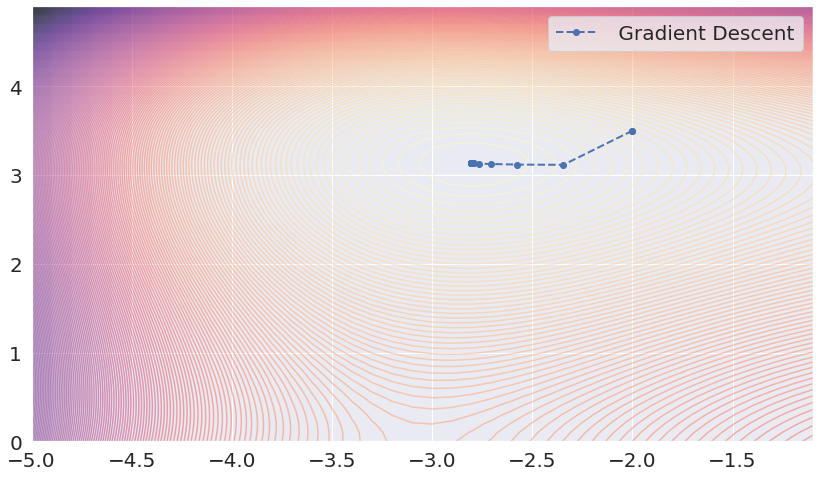

In [ ]:
X = np.arange(-5, -1, 0.1)
Y = np.arange(0, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))

sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

Градиентный спуск выводится из линейной апроксимации. Что будет, если мы возьмем квадратичную апроксимацию

$$
f(x_k +ϵ) =f(x_k) + f'(x_k)ϵ + \frac{1}{2} f''(x_k) ϵ^{2}
$$

Нам нужен шаг ϵ. Как его выразить?

$$
f(x_k +ϵ) =f(x_k) + f'(x_k)ϵ + \frac{1}{2} f''(x_k) ϵ^{2}
$$


$$
\frac{d}{d\epsilon} [ f(x_k) + f'(x_k)ϵ + \frac{1}{2} f''(x_k) ϵ^{2}] = f'(x_k) + f''(x_k) \epsilon = 0
$$


$$
ϵ = - \frac{f'(x_k)}{f''(x_k)}
$$

$$
x_{k+1} = x_k -\frac{f'(x_k)}{f''(x_k)}
$$

В случае n-мерного пространства
$$
x_{k+1} = x_k - {H(x_k)^{-1}}\nabla f(x_k)
$$

In [ ]:
def NewtonDescent(f, gradf, hess_f, x0, alpha=1., max_iter=1000, tol=1e-8,  rho=0.7, beta1=0.3):
    x = x0.copy()

    iteration = 0
    conv_array = [x]


    while True:
        #todo
        gradient = gradf(x)
        hessian= hess_f(x)
        inv_hess = np.linalg.pinv(hessian)
        x = x -inv_hess@gradient
        #END TO DO
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res

In [ ]:
x0 = np.array([-2, 3.5])
res = NewtonDescent(f, grad_f,hess_f , x0, rho=0.5, beta1=0.2)
x_nd, y_nd = get_x_y_from_callback(res['conv_array'], x0)

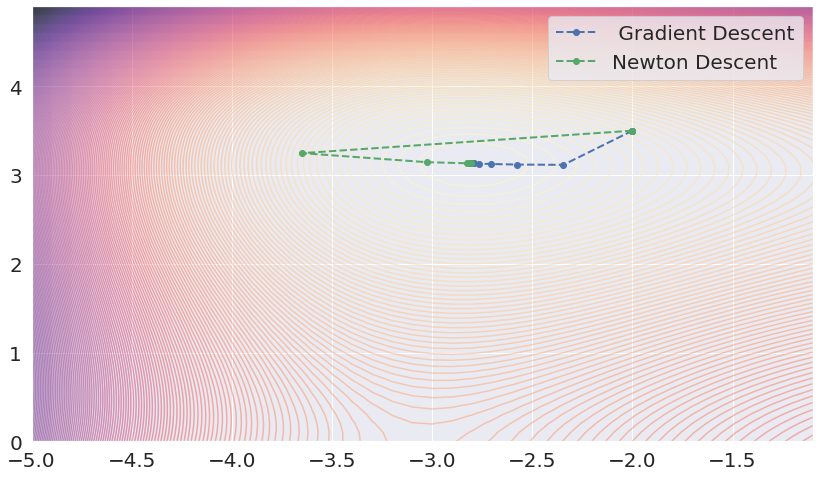

In [ ]:
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd, y_nd ,'--go', linewidth=2, label='Newton Descent')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

In [ ]:
len(x_gd), len(x_nd)

(24, 7)

Квадратичная сходимость!


- Теорема
Пусть $f(x)$ дважды дифференцируема, $∇^{2}f(x)$ удовлетворяет условию Липшица с константой $L$, $f(x)$ сильно выпукла  с констаной $\mu$, и начальное приближение удовлетворяет условию $q = \frac{L \|∇f(x_0)\|}{2 \mu^2} \leq 1$, тогда метод Ньютона сходится к точке глобального минимума $x^{*}$ с квадратичной скоростью
$$
\|x_k - x^{*}\|\leq \frac{2\mu}{L} q^{2^k}
$$

Вроде всё супер, но давайте

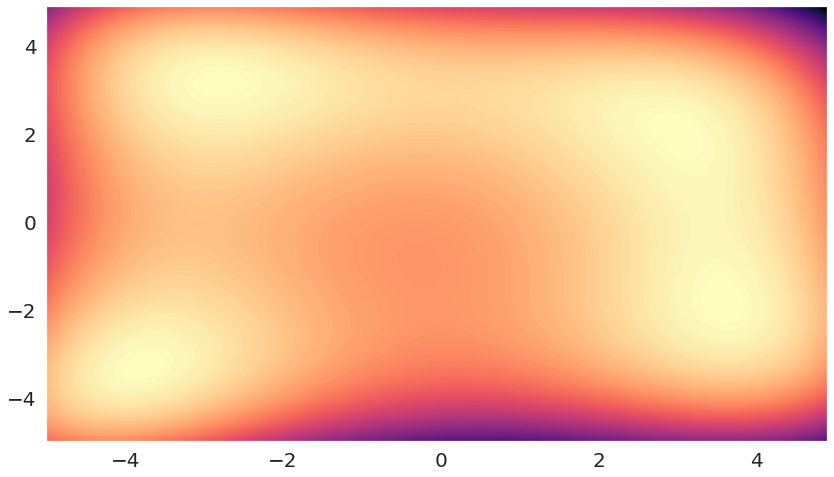

In [ ]:

sns.set()
np.random.seed(23)
n=100


n_points = 1000

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))



plt.figure(figsize = (14, 8))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.legend(loc="best", fontsize=20)
plt.contourf(x, y, f_x, levels =230, cmap = 'magma_r')

In [ ]:
x1 = np.array([-1., 0.])

res = GradientDescent(f, grad_f, x1)
x_gd1, y_gd1 = get_x_y_from_callback(res['conv_array'], x1)

res = NewtonDescent(f, grad_f,hess_f , x1)
x_nd1, y_nd1 = get_x_y_from_callback(res['conv_array'], x1)

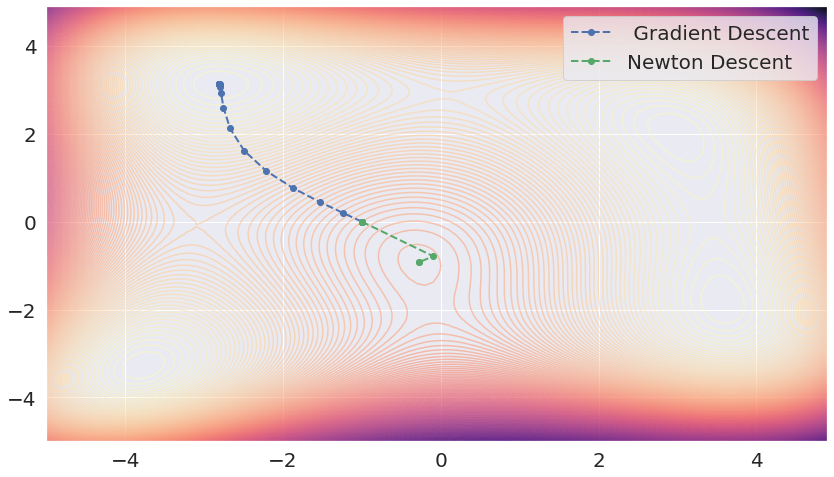

In [ ]:
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd1, y_gd1, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd1, y_nd1 ,'--go', linewidth=2, label='Newton Descent')
# plt.plot(x_na, y_na ,'--go', linewidth=2, label='NA Gradient Descent')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

Можно ввести размер шага

### Дэмпированный метод Ньютона

$$
x_{k+1} = x_k -\alpha_k{H(x_k)^{-1}}\nabla f(x_k)
$$

$a_k$ можно также выбирать бэктрекиноом

In [ ]:
def DampedNewtonDescent(f, gradf, hess_f, x0, alpha=1., max_iter=1000, tol=1e-8,  rho=0.7, beta1=0.3, beta2 =0.9):
    x = x0.copy()

    iteration = 0
    conv_array = [x]


    while True:

        alpha = alpha

        # todo
        gradient = ..
        inv_hess = ..
        ...
        #END TO DO
        iteration += 1
        if np.linalg.norm(gradf(x)) < tol:
            break
        if iteration >= max_iter:
            break
        conv_array.append(x)
    res = {"x": x, "num_iter": iteration, "tol": np.linalg.norm(gradf(x)),  "conv_array": conv_array}
    return res

In [ ]:
x0 = np.array([-2, 3.5])
res = DampedNewtonDescent(f, grad_f,hess_f ,x0, rho=0.5, beta1=0.2,  beta2=0.9)
x_nd, nd = get_x_y_from_callback(res['conv_array'], x0)

In [ ]:
len(x_nd)

7

Итого

## Pro

+ квадратичная сходимость вблизи решения
+ высокая точность полученного решения

## Contra

- необходимо хранить гессиан на каждой итерации:
 памяти
- необходимо решать линейные системы:
 операций
- гессиан может оказаться вырожден
- гессиан может не быть положительно определён  направление
 может не быть направлением убывания

##  КВАЗИ НЬЮТОНОВСКИЕ МЕТОДЫ


У нас есть теперь квадратичная аппроксимация

$$
f(x+\Delta x) 	\approx f(x) +f'(x) \Delta x +\frac{1}{2} (\Delta x)^{\top} H \Delta x
$$

Матрица Гёссе требует $O(n^3)$ памяти и не всегда положительно определен


Можно попробовать приближать матрицу Гессе какой - нибудь положительно определенной матрицей


$$
f(x+\Delta x) 	\approx f(x) +f'(x) \Delta x +\frac{1}{2} (\Delta x) B_k \Delta x
$$

Градиент такой аппроксимации вышлядит

$$
\nabla f(x+\Delta x) 	\approx  + \nabla f(x)  +\frac{1}{2} \Delta^{\top} B_k \Delta x
$$

Отсюда получим квазиньютоновское уравнение

$$
B_{k+1} s_k = y_k
$$

Гдг $s_k = x_{k+1} -x_k$, $y_k =\nabla f(x+1)-\nabla f(x)$

### Barzilai-Borwein method

Идея метода - приблизить Гессиан диагональной матрицей

+   $x_{k+1} = x_k - {H(x_k)^{-1}}\nabla f(x_k)$
+   $x_{k+1} = x_k -  \alpha_k \nabla f(x_k)$


Можно положить $\alpha_k \nabla f(x_k) = (\frac{1}{\alpha_k } I)^{-1} \nabla f(x_k) ≈ {H(x_k)^{-1}}\nabla f(x_k)$


Тогда квазиньютоновское уравнение выглядит так

$$
\alpha^{-1}s_{k-1} ≈ y_{k-1}
$$

Тогда составим задачу оптимизации следующим образом $\alpha= frac{1}{\beta}$
$$
\min_{\beta}= \|\beta s_{k-1} - y_{k-1} \|^2_{2}
$$

тогда
$$
\alpha =\frac{1}{\beta }= \frac{s_{k-1}^{\top}s_{k-1}}{s_{k-1}^{\top} y_{k-1}}
$$


Либо так

$$
\min_{\beta}= \| s_{k-1} - \alpha y_{k-1} \|^2_{2}
$$

$$
\alpha = \frac{s_{k-1}^{\top}y_{k-1}}{y_{k-1}^{\top} y_{k-1}}
$$



In [ ]:

#plt.rc("text", usetex=True)


n = 3000
m = 100
x0 = np.zeros(n)
max_iter = 100
tol = 1e-5
A = np.random.rand(m, n) * 10


def bb_method(f, gradf, x0, tol=1e-6, maxiter=100, callback=None, alpha_type=1):
    it = 0
    x_prev = x0.copy()
    current_tol = np.linalg.norm(gradf(x_prev))
    conv_array = [x_prev]
    alpha = 1e-4
    while current_tol > tol and it < maxiter:
        it += 1
        current_grad = gradf(x_prev)
        if it > 1:
          g = current_grad - prev_grad
          alpha = s.dot(g) /g.dot(g)

        x_next = x_prev - alpha * current_grad
        current_tol = np.linalg.norm(gradf(x_next))
        prev_grad = current_grad
        s = x_next - x_prev
        x_prev = x_next
        conv_array.append(x_next)
    res = {"x": x_next, "num_iter": it ,"tol": np.linalg.norm(gradf(x_next)),  "conv_array": conv_array}
    return res

In [ ]:

def f(x):
    x, y= x[0], x[1]
    return (x*x+y-11)**2 + (x+y*y-7)**2

def grad_f(x):
    x, y= x[0], x[1]
    return np.array([4* x * (x*x+y-11) + 2 *( x+y*y-7),  4 * y *(x+y*y-7 ) + 2*(x*x+y-11) ])

def hess_f(x):
    x, y= x[0], x[1]
    return np.array([[4*  (x*x+y-11) + 8*x*x +2, 4*x+4*y],  [4*x+4*y,4* (x+y*y-7) + 8*y*y +2 ] ])

In [ ]:
res_bb = bb_method(f, grad_f, np.array([-2, 3.5]))

In [ ]:
a= np.array([[1,2]])
b= np.array([[2,3]])

In [ ]:
a@b, a.dot(b)

(8, 8)

$ab^T$

In [ ]:
np.outer(a, b),

(array([[2, 3],
        [4, 6]]),)

In [ ]:
x_bb, y_bb = get_x_y_from_callback(res_bb['conv_array'],  np.array([-2, 3.5]))

In [ ]:
X = np.arange(-5, -1, 0.1)
Y = np.arange(0, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))

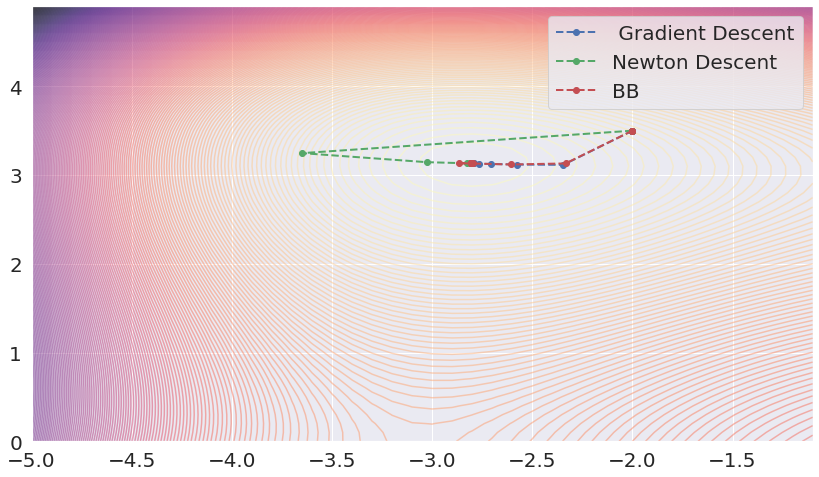

In [ ]:
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd, y_nd ,'--go', linewidth=2, label='Newton Descent')
plt.plot(x_bb, y_bb, '--ro',linewidth=2, label='BB')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

In [ ]:
len(x_gd), len(x_nd), len(x_bb)

(24, 7, 12)

## Можно посмотреть на задачу по -другому


\begin{align*}
& \min_B \| B_k - B_{k+1} \| \\
\text{s.t. } & B_{k+1} = B_{k+1}^{\top}\\
& B_{k+1}s_k = y_k
\end{align*}

## DFP (Davidon-Fletcher-Powell)

$$
B_{k+1} = (I - \rho_k y_k s^{\top}_k)B_k(I - \rho_k s_ky^{\top}_k) + \rho_k y_k y^{\top}_k,
$$

где $\rho_k = \dfrac{1}{y^{\top}_k s_k}$,

или с помощью формулы Шермана-Морисона-Вудбери ${\displaystyle \left(A+uv^{\textsf {T}}\right)^{-1}=A^{-1}-{A^{-1}uv^{\textsf {T}}A^{-1} \over 1+v^{\textsf {T}}A^{-1}u}.}$





$$
B^{-1}_{k+1} = H_{k+1} = H_k - \dfrac{H_ky_k y_k^{\top}H_k}{y^{\top}_kH_ky_k} + \dfrac{s_ks^{\top}_k}{y^{\top}_ks_k}
$$



A @v
$a b^{T}$ @v


$a b^{T} @$v

$vv^T$ , $ab^T$

In [ ]:
def dfp_method2(f,  gradf, x0, tol=1e-6, maxiter=100):
  k = 0
  H = np.eye(x0.shape[0])
  x_prev = x0
  grad_prev = gradf(x_prev)
  alpha = 1
  current_tol = np.linalg.norm(gradf(x_prev))
  conv_array = []
  while current_tol > tol and maxiter > k:
      dk = - H @grad_prev
      # alpha0 = alpha
      line_search = sp.optimize.line_search(f, gradf, x_prev, dk)
      alpha = line_search[0]
      x_next = x_prev +alpha* dk
      sk = alpha* dk

      grad_next=grad_f(x_next)
      qk= grad_next -grad_prev

      Hy  = H@qk
      H = H - np.outer(Hy, Hy)/(qk @ Hy) +np.outer(sk, sk)/(qk@sk)




      x_prev = x_next
      grad_prev = grad_next
      conv_array.append(x_prev)
      current_tol = np.linalg.norm(gradf(x_prev))
      k = k+1

  res = {"x": x_next, "num_iter": k ,"tol": np.linalg.norm(gradf(x_next)),  "conv_array": conv_array}
  return res
  # return conv_array
#



In [ ]:
res_dfp = dfp_method2(f, grad_f, np.array([-2, 3.5]))
x_dfp, y_dfp = get_x_y_from_callback(res_dfp['conv_array'],  np.array([-2, 3.5]))

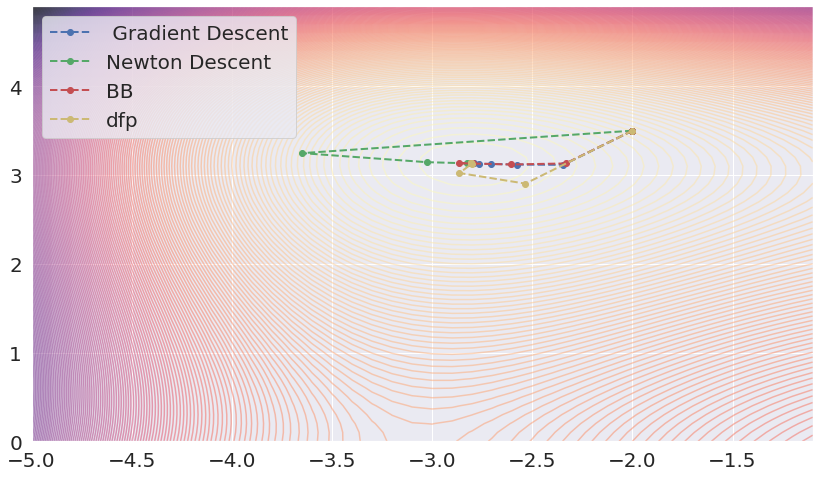

In [ ]:
sns.set()
X = np.arange(-5, -1, 0.1)
Y = np.arange(0, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd, y_nd ,'--go', linewidth=2, label='Newton Descent')
plt.plot(x_bb, y_bb, '--ro',linewidth=2, label='BB')
plt.plot(x_dfp, y_dfp, '--yo',linewidth=2, label='dfp')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
\plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

In [ ]:
len(x_gd), len(x_nd), len(x_bb), len(x_dfp)

(24, 7, 12, 8)

In [ ]:
N = 100
M = 10
X = np.linspace(0, 5, N)
Y = np.linspace(0, 5, N)
x, y = np.meshgrid(X, Y)
x = x.reshape(-1, )
y = y.reshape(-1, )

coordinates = np.vstack([x, y])

c = np.array([.23, .14])
A = np.abs(np.random.rand(M, 2))
B = np.abs(np.random.rand(M, 1)) * 10

res = (c @ coordinates) - np.sum(np.log(abs(B - A @ coordinates)), axis=0)
res = res.reshape(N, N)
x = x.reshape(N, N)
y = y.reshape(N, N)


In [ ]:
np.random.rand(100, 2) @ np.array([[10],[10]])

In [ ]:
np.array([1, 2])@np.array([2,1])

4

## BFGS

\begin{align*}
& \min_H \| H_k - H_{k+1} \| \\
\text{s.t. } & H_{k+1} = H_{k+1}^{\top}\\
& H_{k+1}y_k = s_k
\end{align*}

Формула пересчёта для метода BFGS:

$$
H_{k+1} = (I - \rho_k s_ky^{\top}_k)H_k(I - \rho_k y_k s^{\top}_k) + \rho_k s_k s^{\top}_k,
$$

где $\rho_k = \dfrac{1}{y^{\top}_k s_k}$

In [ ]:
from numpy.core.multiarray import result_type
import numpy as np
import numpy.linalg as ln
import scipy as sp
import scipy.optimize




def bfgs_method(f, gradf, x0, maxiter=None, epsi=10e-3):


    if maxiter is None:
        maxiter = len(x0) * 200

    # initial values
    k = 0
    gfk = gradf(x0)
    N = len(x0)
    # Set the Identity matrix I.
    I = np.eye(N, dtype=int)
    Hk = I
    xk = x0
    conv_array = []

    while ln.norm(gfk) > epsi and k < maxiter:

        # pk - direction of search

        pk = -np.dot(Hk, gfk)

        # Line search constants for the Wolfe conditions.
        # Repeating the line search

        # line_search returns not only alpha
        # but only this value is interesting for us

        line_search = sp.optimize.line_search(f, grad_f, xk, pk)
        alpha_k = line_search[0]

        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1

        gfkp1 = gradf(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1

        k += 1


        rho = 1. / yk.dot(sk)
        if k == 0:
            Hk = Hk / yk.dot(yk) / rho
        Hy = Hk @ yk
        Hk = Hk +   (np.outer(sk, sk) * rho) *(1 +  (yk @ Hy) * rho) - (np.outer(Hy,sk) + np.outer(sk, Hy))* rho
        conv_array.append(xk)
    res = {"x": xk, "num_iter": k ,"tol": np.linalg.norm(gradf(xk)),  "conv_array": conv_array}
    return res
    # return (xk, k)


result = bfgs_method(f, grad_f, np.array([-2, 3.5]))



In [ ]:
# res_bfgs = bfgs_method(f, grad_f, np.array([-2, 3.5]))
x_bfgs, y_bfgs = get_x_y_from_callback(result['conv_array'],  np.array([-2, 3.5]))

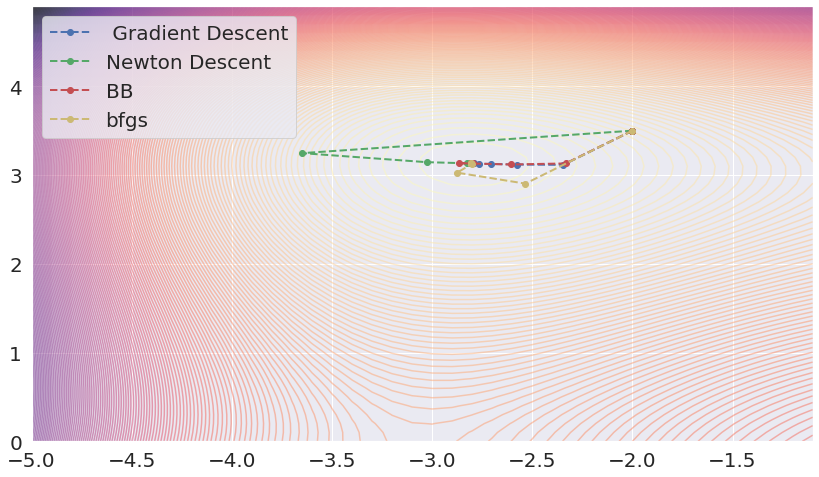

In [ ]:
sns.set()

plt.figure(figsize = (14, 8))
plt.plot(x_gd, y_gd, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd, y_nd ,'--go', linewidth=2, label='Newton Descent')
plt.plot(x_bb, y_bb, '--ro',linewidth=2, label='BB')
plt.plot(x_bfgs, y_bfgs, '--yo',linewidth=2, label='bfgs')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

In [ ]:
res_bfgs1 = bfgs_method(f, grad_f, x1)
x_bfgs1, y_bfgs1 = get_x_y_from_callback(res_bfgs1['conv_array'],  x1)

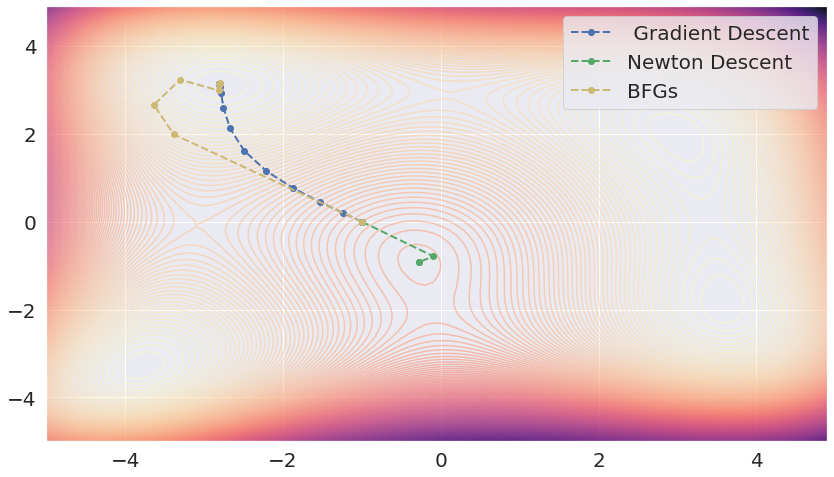

In [ ]:
sns.set()

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(X, Y)

f_x = f((x,y))

plt.figure(figsize = (14, 8))
plt.plot(x_gd1, y_gd1, '--bo',linewidth=2, label=' Gradient Descent')
plt.plot(x_nd1, y_nd1 ,'--go', linewidth=2, label='Newton Descent')
plt.plot(x_bfgs1, y_bfgs1 ,'--yo', linewidth=2, label='BFGs')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.contour(x, y, f_x,  levels =230, cmap = 'magma_r', alpha=0.5)

In [ ]:
len(x_gd1), len(x_nd1), len(x_bfgs1)

(28, 5, 9)

In [ ]:
result["conv_array"]

[array([-2.53464598,  2.90336608]),
 array([-2.8753044 ,  3.02697379]),
 array([-2.80097897,  3.12632361]),
 array([-2.80569045,  3.1320381 ]),
 array([-2.805117  ,  3.13131073])]

## BFGS с ограниченной памятью (L-BFGS)

- В методе BFGS нужна не сама матрица $H$, а только функция умножения её на вектор
- Поскольку требуется локальная оценка гессиана, старые значения векторов $s$ и $y$ могут портить текущую оценку

**Идея**

- Хранить $k \ll n$ последних векторов $s$ и $y$ - снижение требуемой памяти с $n^2$ до $kn$
- Выполнение умножения на вектор рекурсивно, без явного формирования матрицы $H$


$$
H_{k+1} = V_{k}^{T} H_{k} V_{k} + \rho_k s_k s_k^{T}
$$

$$
V_{k} = I  -\rho_k y_k s_k^{T}
$$